<a href="https://colab.research.google.com/github/akshitsawnani/Intrusion-Detection-System/blob/main/18BIT0318_IDS_nasscom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import warnings; warnings.simplefilter('ignore')
from sklearn.preprocessing import StandardScaler

In [ ]:
data_train=pd.read_csv("/content/drive/My Drive/DATASETIOT/UNSW_2018_IoT_Botnet_Final_10_best_Training.csv")

In [ ]:
data_test=pd.read_csv("/content/drive/My Drive/DATASETIOT/UNSW_2018_IoT_Botnet_Final_10_best_Testing.csv")

In [ ]:
data_train.head()

,pkSeqID,proto,saddr,sport,daddr,dport,seq,stddev,N_IN_Conn_P_SrcIP,min,state_number,mean,N_IN_Conn_P_DstIP,drate,srate,max,attack,category,subcategory
0,3142762,udp,192.168.100.150,6551,192.168.100.3,80,251984,1.900363,100,0.000000,4,2.687519,100,0.0,0.494549,4.031619,1,DDoS,UDP
1,2432264,tcp,192.168.100.150,5532,192.168.100.3,80,256724,0.078003,38,3.856930,3,3.934927,100,0.0,0.256493,4.012924,1,DDoS,TCP
2,1976315,tcp,192.168.100.147,27165,192.168.100.3,80,62921,0.268666,100,2.974100,3,3.341429,100,0.0,0.294880,3.609205,1,DDoS,TCP
3,1240757,udp,192.168.100.150,48719,192.168.100.3,80,99168,1.823185,63,0.000000,4,3.222832,63,0.0,0.461435,4.942302,1,DoS,UDP
4,3257991,udp,192.168.100.147,22461,192.168.100.3,80,105063,0.822418,100,2.979995,4,3.983222,100,0.0,1.002999,4.994452,1,DDoS,UDP


In [ ]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2934817 entries, 0 to 2934816
Data columns (total 19 columns):
 #   Column             Dtype  
---  ------             -----  
 0   pkSeqID            int64  
 1   proto              object 
 2   saddr              object 
 3   sport              object 
 4   daddr              object 
 5   dport              object 
 6   seq                int64  
 7   stddev             float64
 8   N_IN_Conn_P_SrcIP  int64  
 9   min                float64
 10  state_number       int64  
 11  mean               float64
 12  N_IN_Conn_P_DstIP  int64  
 13  drate              float64
 14  srate              float64
 15  max                float64
 16  attack             int64  
 17  category           object 
 18  subcategory        object 
dtypes: float64(6), int64(6), object(7)
memory usage: 425.4+ MB


In [ ]:
data_train.shape

(2934817, 19)

In [ ]:
data_test.shape

(733705, 19)

In [ ]:
data_train.isnull().sum()

pkSeqID              0
proto                0
saddr                0
sport                0
daddr                0
dport                0
seq                  0
stddev               0
N_IN_Conn_P_SrcIP    0
min                  0
state_number         0
mean                 0
N_IN_Conn_P_DstIP    0
drate                0
srate                0
max                  0
attack               0
category             0
subcategory          0
dtype: int64

In [ ]:
data_train.drop(["pkSeqID","seq","subcategory"], axis=1, inplace=True)

In [ ]:
data_test.drop(["pkSeqID","seq","subcategory"], axis=1, inplace=True)

In [ ]:
data_train.dtypes[data_train.dtypes=='object']

proto       object
saddr       object
sport       object
daddr       object
dport       object
category    object
dtype: object

In [ ]:
data_train['saddr'].value_counts()

192.168.100.147              761360
192.168.100.148              738642
192.168.100.150              712260
192.168.100.149              711466
192.168.100.3                  6609
192.168.100.5                  4107
192.168.100.6                   272
192.168.100.7                    34
192.168.100.4                    17
192.168.100.1                    14
192.168.100.27                    9
192.168.100.46                    8
fe80::250:56ff:febe:254           5
192.168.100.55                    3
fe80::250:56ff:febe:89ee          2
fe80::250:56ff:febe:26db          2
fe80::2c6a:ff9b:7e14:166a         2
fe80::250:56ff:febe:c038          2
fe80::c0c0:aa20:45b9:bdd9         2
fe80::250:56ff:febe:e9d9          1
Name: saddr, dtype: int64

In [ ]:
data_train['sport'].value_counts()

0x0303    7156
80        3220
1822       878
60541      869
1216       868
          ... 
32047       31
18992       30
39305       30
0x000d      10
0x0011       8
Name: sport, Length: 65541, dtype: int64

In [ ]:
data_train['daddr'].value_counts()

192.168.100.3      1900562
192.168.100.5       361192
192.168.100.7       332161
192.168.100.6       329679
192.168.100.150       3040
                    ...   
205.251.192.170          1
205.251.194.201          1
205.251.194.154          1
224.0.0.252              1
216.239.36.10            1
Name: daddr, Length: 81, dtype: int64

In [ ]:
data_train['dport'].value_counts()

80       2858794
1           5379
3306        3757
53           275
-1           166
          ...   
40335          1
49723          1
30593          1
8241           1
65165          1
Name: dport, Length: 6906, dtype: int64

In [ ]:
data_train['category'].value_counts()

DDoS              1541315
DoS               1320148
Reconnaissance      72919
Normal                370
Theft                  65
Name: category, dtype: int64

In [ ]:
data_train.shape

(2934817, 16)

In [ ]:
indexNames = data_train[data_train['category']=='Theft'].index
data_train.drop(indexNames , inplace=True)

In [ ]:
data_train.shape

(2934752, 16)

In [ ]:
data_train['sport']=data_train['sport'].replace(['0x0303'],'771') 
data_train['sport']=data_train['sport'].replace(['0x0011'],'17')
data_train['sport']=data_train['sport'].replace(['0x000d'],'13')
data_train['sport']=data_train['sport'].replace(['0x0008'],'8')

In [ ]:
data_train["sport"] = data_train["sport"].astype(str).astype(int)

In [ ]:
data_test['sport']=data_test['sport'].replace(['0x0303'],'771') 
data_test['sport']=data_test['sport'].replace(['0x0011'],'17')
data_test['sport']=data_test['sport'].replace(['0x000d'],'13')
data_test['sport']=data_test['sport'].replace(['0x0008'],'8')

In [ ]:
data_test["sport"] = data_test["sport"].astype(str).astype(int)

In [ ]:
data_train['dport']=data_train.dport.apply(lambda x: int(x,16) if len(x)>1 and x[1]=="x" else int(x))

In [ ]:
data_test['dport']=data_test.dport.apply(lambda x: int(x,16) if len(x)>1 and x[1]=="x" else int(x))

In [ ]:
data_train['dport'].value_counts()

 80       2858794
 1           5379
 3306        3757
 53           275
-1            163
           ...   
 13445          1
 6636           1
 29153          1
 29152          1
 8863           1
Name: dport, Length: 6778, dtype: int64

In [ ]:
data_train['sport'].value_counts()

771      7203
80       3220
1822      878
60541     869
1216      868
         ... 
56775      31
39364      31
32047      31
39305      30
18992      30
Name: sport, Length: 65537, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data_train["saddr_enc"]= le.fit_transform(data_train.saddr)
data_train["daddr_enc"]= le.fit_transform(data_train.daddr)
data_train["proto_enc"]= le.fit_transform(data_train.proto)
data_train["category_enc"]= le.fit_transform(data_train.category)
data_train.drop(['saddr','daddr','proto','category'], axis=1, inplace=True)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data_test["saddr_enc"]= le.fit_transform(data_test.saddr)
data_test["daddr_enc"]= le.fit_transform(data_test.daddr)
data_test["proto_enc"]= le.fit_transform(data_test.proto)
data_test["category_enc"]= le.fit_transform(data_test.category)
data_test.drop(['saddr','daddr','proto','category'], axis=1, inplace=True)

In [ ]:
data_train.head()

,sport,dport,stddev,N_IN_Conn_P_SrcIP,min,state_number,mean,N_IN_Conn_P_DstIP,drate,srate,max,attack,saddr_enc,daddr_enc,proto_enc,category_enc
0,6551,80,1.900363,100,0.000000,4,2.687519,100,0.0,0.494549,4.031619,1,4,15,4,0
1,5532,80,0.078003,38,3.856930,3,3.934927,100,0.0,0.256493,4.012924,1,4,15,3,0
2,27165,80,0.268666,100,2.974100,3,3.341429,100,0.0,0.294880,3.609205,1,1,15,3,0
3,48719,80,1.823185,63,0.000000,4,3.222832,63,0.0,0.461435,4.942302,1,4,15,4,1
4,22461,80,0.822418,100,2.979995,4,3.983222,100,0.0,1.002999,4.994452,1,1,15,4,0


In [ ]:
data_train['category_enc'].value_counts()

0    1541315
1    1320148
3      72919
2        370
Name: category_enc, dtype: int64

In [ ]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2934752 entries, 0 to 2934816
Data columns (total 16 columns):
 #   Column             Dtype  
---  ------             -----  
 0   sport              int64  
 1   dport              int64  
 2   stddev             float64
 3   N_IN_Conn_P_SrcIP  int64  
 4   min                float64
 5   state_number       int64  
 6   mean               float64
 7   N_IN_Conn_P_DstIP  int64  
 8   drate              float64
 9   srate              float64
 10  max                float64
 11  attack             int64  
 12  saddr_enc          int64  
 13  daddr_enc          int64  
 14  proto_enc          int64  
 15  category_enc       int64  
dtypes: float64(6), int64(10)
memory usage: 380.6 MB


In [ ]:
y_train=data_train["category_enc"]

In [ ]:
y_test=data_test["category_enc"]

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
features = data_train.iloc[:,:-1]
cols=features.columns
scaled_features= scaler.fit_transform(features)
data_train= pd.DataFrame(scaled_features,columns=cols)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
features = data_test.iloc[:,:-1]
cols=features.columns
scaled_features= scaler.fit_transform(features)
data_test= pd.DataFrame(scaled_features,columns=cols)

In [ ]:
data_train.head()

,sport,dport,stddev,N_IN_Conn_P_SrcIP,min,state_number,mean,N_IN_Conn_P_DstIP,drate,srate,max,attack,saddr_enc,daddr_enc,proto_enc
0,-1.380796,-0.094028,1.260991,0.715435,-0.685661,0.729327,0.301113,0.415159,-0.00763,-0.003355,0.543986,0.011229,1.301786,-0.638504,0.897321
1,-1.434107,-0.094028,-1.006649,-1.826659,1.914132,-0.113083,1.122991,0.415159,-0.00763,-0.003659,0.533940,0.011229,1.301786,-0.638504,-1.049199
2,-0.302346,-0.094028,-0.769399,0.715435,1.319054,-0.113083,0.731954,0.415159,-0.00763,-0.003610,0.316991,0.011229,-1.281470,-0.638504,-1.049199
3,0.825282,-0.094028,1.164956,-0.801621,-0.685661,0.729327,0.653814,-1.621898,-0.00763,-0.003397,1.033365,0.011229,1.301786,-0.638504,0.897321
4,-0.548442,-0.094028,-0.080342,0.715435,1.323028,0.729327,1.154811,0.415159,-0.00763,-0.002707,1.061389,0.011229,-1.281470,-0.638504,0.897321


In [ ]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2934752 entries, 0 to 2934751
Data columns (total 15 columns):
 #   Column             Dtype  
---  ------             -----  
 0   sport              float64
 1   dport              float64
 2   stddev             float64
 3   N_IN_Conn_P_SrcIP  float64
 4   min                float64
 5   state_number       float64
 6   mean               float64
 7   N_IN_Conn_P_DstIP  float64
 8   drate              float64
 9   srate              float64
 10  max                float64
 11  attack             float64
 12  saddr_enc          float64
 13  daddr_enc          float64
 14  proto_enc          float64
dtypes: float64(15)
memory usage: 335.9 MB


In [ ]:
y_train.value_counts()

0    1541315
1    1320148
3      72919
2        370
Name: category_enc, dtype: int64

In [ ]:

import imblearn
from imblearn.over_sampling import RandomOverSampler
samp_strat= { 0 : 1541315, 1 : 1320148, 2 : 72919, 3 : 72919}
random_over= RandomOverSampler(sampling_strategy=samp_strat,random_state=1)
Xres,yres = random_over.fit_resample(data_train,y_train)

In [ ]:
pd.Series(yres).value_counts()

0    1541315
1    1320148
3      72919
2      72919
dtype: int64

In [ ]:
import imblearn
from imblearn.under_sampling import RandomUnderSampler
samp_strat= { 0 : 72919, 1 : 72919, 2 : 72919, 3 : 72919}
random_under= RandomUnderSampler(sampling_strategy=samp_strat,random_state=1)
Xres1,yres1 = random_under.fit_resample(Xres,yres)


In [ ]:
pd.Series(yres1).value_counts()

3    72919
2    72919
1    72919
0    72919
dtype: int64

In [ ]:
from sklearn.linear_model import LogisticRegression
import time
start = time.time()
logisticRegr = LogisticRegression()
logisticRegr.fit(Xres1, yres1)
pred= logisticRegr.predict(data_test)
score = logisticRegr.score(data_test, y_test)
end = time.time()
print(end - start, "seconds\n")
score

24.991817712783813 seconds



0.9798488493331788

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
classification_report(y_test,pred)

'              precision    recall  f1-score   support\n\n           0       0.98      0.99      0.98    385309\n           1       0.99      0.97      0.98    330112\n           2       1.00      1.00      1.00       107\n           3       0.83      0.96      0.89     18163\n           4       0.00      0.00      0.00        14\n\n    accuracy                           0.98    733705\n   macro avg       0.76      0.78      0.77    733705\nweighted avg       0.98      0.98      0.98    733705\n'

In [ ]:
confusion_matrix(y_test,pred)

array([[379950,   2001,      0,   3358,      0],
       [  8428, 321510,      0,    174,      0],
       [     0,      0,    107,      0,      0],
       [   384,    426,      0,  17353,      0],
       [     0,     13,      0,      1,      0]])

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_test,pred,average='micro')

0.9798488493331788

In [ ]:
from sklearn.metrics import recall_score
recall_score(y_test, pred, average='micro')

0.9798488493331788

In [ ]:
from sklearn.metrics import precision_score
precision_score(y_test,pred, average='micro')

0.9798488493331788

In [ ]:
y_test


0         1
1         0
2         0
3         0
4         1
         ..
733700    1
733701    0
733702    0
733703    1
733704    0
Name: category_enc, Length: 733705, dtype: int64

In [ ]:
y_pred_proba=logisticRegr.predict_proba(data_test)


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
prediction = logisticRegr.predict(data_test)
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98    385309
           1       0.99      0.97      0.98    330112
           2       1.00      1.00      1.00       107
           3       0.83      0.96      0.89     18163
           4       0.00      0.00      0.00        14

    accuracy                           0.98    733705
   macro avg       0.76      0.78      0.77    733705
weighted avg       0.98      0.98      0.98    733705



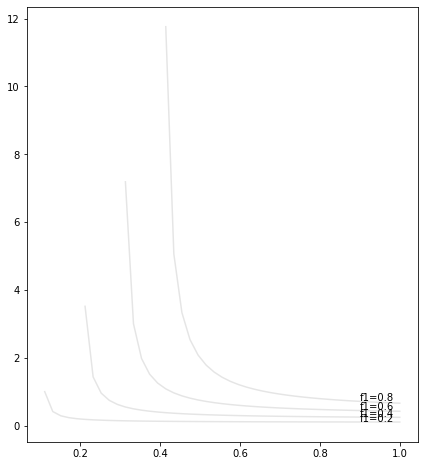

In [ ]:
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
from itertools import cycle

plt.figure(figsize=(7, 8))
f_scores = np.linspace(0.2, 0.8, num=4)
lines = []
labels = []
for f1_score in f_scores:
    x = np.linspace(0.01, 1)
    y = f1_score * x / (2 * x - f1_score)
    l, = plt.plot(x[y >= 0], y[y >= 0], color='gray', alpha=0.2)
    plt.annotate('f1={0:0.1f}'.format(f1_score), xy=(0.9, y[45] + 0.02))
lines.append(l)
labels.append('iso-f1 curves')
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression
lr2 = LogisticRegression(penalty='l2',C = 25, solver = 'lbfgs',max_iter=1000,n_jobs=100)
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lr2, Xres1, yres1, cv=10)
scores

array([0.98608064, 0.98649205, 0.98693774, 0.987452  , 0.98669775,
       0.98676632, 0.98717729, 0.98724586, 0.98587445, 0.987143  ])

In [ ]:
scores.mean()

0.986786709546766

In [ ]:
import time
start = time.time()
lr2.fit (Xres1,yres1)
prediction= lr2.predict(data_test)
score = lr2.score(data_test, y_test)
end = time.time()
print(end - start, "seconds\n")
score

166.57019662857056 seconds



0.9861851834184039